<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Hierarchical Clustering


---

## Learning Objectives

### Core
- Explain the hierarchical clustering algorithm
- Understand the differences between K-Means and hierarchical clustering
- Plot, analyze, and describe the dendrogram
- Apply hierarchical clustering with sklearn

### Target
- Gain an intuition for how clusters are selected with hierarchical clustering
- Understand the notion of linkage

### Stretch
- Get the intuition behind the cophenetic correlation coefficient


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#What-is-hierarchical-clustering?" data-toc-modified-id="What-is-hierarchical-clustering?-2">What is hierarchical clustering?</a></span></li><li><span><a href="#Hierarchical-clustering-and-K-Means" data-toc-modified-id="Hierarchical-clustering-and-K-Means-3">Hierarchical clustering and K-Means</a></span><ul class="toc-item"><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-3.1">K-Means Clustering</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.2">Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Distances-between-clusters" data-toc-modified-id="Distances-between-clusters-4">Distances between clusters</a></span></li><li><span><a href="#Single-linkage-example" data-toc-modified-id="Single-linkage-example-5">Single linkage example</a></span><ul class="toc-item"><li><span><a href="#First-let's-consider-a-single-series-of-distances-between-X/Y-points-in-2D-space,-represented-as-a-matrix." data-toc-modified-id="First-let's-consider-a-single-series-of-distances-between-X/Y-points-in-2D-space,-represented-as-a-matrix.-5.1">First let's consider a single series of distances between X/Y points in 2D space, represented as a matrix.</a></span></li></ul></li><li><span><a href="#Generate-some-data" data-toc-modified-id="Generate-some-data-6">Generate some data</a></span></li><li><span><a href="#Hierachical-clustering-with-sklearn" data-toc-modified-id="Hierachical-clustering-with-sklearn-7">Hierachical clustering with sklearn</a></span></li><li><span><a href="#Hierarchical-clustering-with-SciPy" data-toc-modified-id="Hierarchical-clustering-with-SciPy-8">Hierarchical clustering with SciPy</a></span><ul class="toc-item"><li><span><a href="#Explanation-of-the-linkage-matrix" data-toc-modified-id="Explanation-of-the-linkage-matrix-8.1">Explanation of the linkage matrix</a></span></li><li><span><a href="#Plotting-the-dendrogram" data-toc-modified-id="Plotting-the-dendrogram-8.2">Plotting the dendrogram</a></span></li><li><span><a href="#The-cophenetic-correlation-coefficient" data-toc-modified-id="The-cophenetic-correlation-coefficient-8.3">The cophenetic correlation coefficient</a></span></li><li><span><a href="#Determining-the-clusters" data-toc-modified-id="Determining-the-clusters-8.4">Determining the clusters</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9">Conclusion</a></span></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-10">Additional resources</a></span></li></ul></div>

## What is hierarchical clustering?

---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests: 

- Build hierarchies of clusters
- Connect the clusters in the hierarchy with links

Once the links are determined, we can display them in what is called a **dendrogram** - a graph that displays all of these links in their hierarchical structure.


To find clusters in a dendrogram, we can cut the graph to find the clusters - we'll go over this later in the lesson. 


![](https://snag.gy/J8iyBj.jpg)

## Hierarchical clustering and K-Means
---


Hierarchical clustering, like K-Means, is an unsupervised learning algorithm to divide our data into groups. 

### K-Means Clustering
- Groups data into $K$ clusters minimizing the within-cluster-sum-of-squares.
- The sklearn implementation is based on Euclidean distance between observations and cluster centers.
- The algorithm usually uses random initialization of cluster centers and is therefore not deterministic.
- Forms convex-shaped clusters.

### Hierarchical Clustering

- There exist two strategies for forming clusters:
    - Bottom-up (Agglomerative): 
        - Start with each observation in its own cluster
        - At each iteration unite the two most similar clusters into a single cluster
        - Continue until all observations are united into a single cluster
    - Top-Down (Divisive):
        - Start with all observations in a single cluster
        - At each iteration, divide one of the clusters into two new clusters so that the most dissimilar clusters emerge
        - Continue until all observations are separated into their own cluster
- The formation of clusters can be visualized through a dendrogram.
- In this lesson we will only use agglomerative clustering.
- Hierarchical clustering does not require to fix the number of clusters initially - it can be set once the full dendgrogram has been obtained.
- The most important aspect of hierarchical clustering is to define a suitable similarity/distance measure between clusters. 
    - The default is Euclidean distance in feature space. It can be calculated between each pair of single observations, but once clusters have been formed we have to decide how to calculate the distance between clusters.
    - Many other distance metrics can be used. This is relevant e.g. for Natural Language Processing or graph data.
- Clusters are formed with a greedy algorithm - using the best fusion/division of clusters at each step. This procedure is deterministic.
- Scales much worse with the number of observations than K-Means.

## Distances between clusters

To merge clusters into larger clusters, we have to find the most similar ones at each iteration step. Since clusters may contain many observations, we have to decide how to measure similarity between clusters. In hierarchical clustering, we do not determine cluster centroids like in K-Means. Instead we can decide between one of the following strategies:

- **Single linkage:** measures the distance between pairs of clusters as the distance between the closest observations of each cluster in feature space
- **Average linkage:** measures the distance between pairs of clusters as the average distance between all possible pairs of observations from each cluster in feature space
- **Maximum or complete linkage:** measures the distance between pairs of clusters as the distance between the furthest observations of each cluster in feature space
- **Ward:** considers the sum-of-squared-differences within each cluster (similar to K-Means). It  requires the use of Euclidean distance, whereas the other choices can use arbitrary metrics.


The Ward distance is calculated as 

$$
d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+\frac{|v|+|t|}{T}d(v,t)^2-\frac{|v|}{T}d(s,t)^2}
$$

Here we denoted as following:

- $u$, $v$, $s$, $t$ denote clusters
    - $u$: this is the cluster formed by merging the clusters $s$ and $t$
    - $v$: this is any of the other clusters
- $d(u,v)$, etc.: denotes the distance between pairs of clusters
- $|s|$, etc.: denotes the cardinality of the respective cluster, i.e. the number of observations contained
- $T = |v|+|s|+|t|$

> **Note:** These are the sklearn options, scipy has even more.

## Single linkage example

We follow an example from [Kardi Teknomo](https://people.revoledu.com/kardi/tutorial/Clustering/Numerical%20Example.htm).

![](https://snag.gy/SDZyGz.jpg)


### First let's consider a single series of distances between X/Y points in 2D space, represented as a matrix.

- Initially, each observation A-F would be considered a cluster.  
- At each iteration step, we find the closest pair of clusters.
- Ultimately, we cluster all of these into a single cluster.


![](https://snag.gy/EcRNns.jpg)

- **In this case, the closest cluster is between cluster F and D with shortest distance of 0.5.**
- **Thus, we group cluster D and F into cluster (D, F).**

- The distances between observations A, B, C, E are as before.
- For all of  these observations we have to determine the distance to the newly formed cluster {D,F}.

![](https://snag.gy/siCURp.jpg)

- **Here we decide to calculate the distance to the newly formed cluster through single linkage.**
- We determine the minimal distance out of all observations contained in two clusters.
- That means we pick for each observation A, B, C, E the distance to either D or F, whichever is closer.

$$
\begin{eqnarray*}
d(\{D,F\},A) &= \min(d(D,A), d(F,A)) &= \min(3.61, 3.20) = 3.20\\
d(\{D,F\},B) &= \min(d(D,B), d(F,B)) &= \min(2.92, 2.50) = 2.50\\
d(\{D,F\},C) &= \min(d(D,C), d(F,C)) &= \min(2.24, 2.50) = 2.24\\
d(\{D,F\},E) &= \min(d(D,E), d(F,E)) &= \min(1.00, 1.12) = 1.00\\
\end{eqnarray*}
$$
     

![](https://snag.gy/lXQDf2.jpg)

- Now, with a distance of 0.71, the clusters A and B are the closest. So we combine them into the cluster {A,B}.

![](https://snag.gy/syM7BH.jpg)

- Again, we have to update the distance matrix using single linkage.

$$
\begin{eqnarray*}
d(\{A,B\},C) &= \min(d(A,C), d(B,C)) &= \min(5.66, 4.95) = 4.95\\
d(\{A,B\},\{D,F\}) &= \min(d(A,D), d(A,F), d(B,D), d(B,F)) 
&= \min(3.61, 3.20, 2.92, 2.50) = 2.50\\
d(\{A,B\},E) &= \min(d(A,E), d(B,E)) &= \min(4.24, 3.54) = 3.54\\
\end{eqnarray*}
$$


![](https://snag.gy/Tg4V6J.jpg)

- Now E and {D,F} are closest with 1.00.

- Again, we have to update the distance matrix using single linkage.
$$
\begin{eqnarray*}
d(\{D,E,F\},C) &&= \min(d(D,C), d(E,C), d(F,C)) = \min(2.24,1.41,2.50) = 1.41\\
d(\{A,B\},\{D,E,F\}) &&= \min(d(A,D), d(A,E), d(A,F), d(B,D), d(B,E), d(B,F)) \\
&&= \min(3.61,4.24,3.20,2.92,3.54,2.50) = 2.50
\end{eqnarray*}
$$

- At the next step, we merge {D,E,F} and C into a single cluster.
- Updating the distance matrix, we obtain

$$
\begin{eqnarray*}
d(\{C,D,E,F\},\{A,B\}) &&= 
\min(d(C,A), d(C,B), d(D,A), d(D,B), d(E,A), d(E,B), d(F,A), d(F,B)) \\
&&= \min(5.66, 4.95,3.61,2.92,4.24,3.54,3.20,2.50) \\
&&= 2.50
\end{eqnarray*}
$$


![](https://snag.gy/lrdR8b.jpg)


- In the beginning we had 6 clusters: A, B, C, D, E and F.
- We merged clusters D and F into cluster {D, F} at distance 0.50.
- We merged clusters A and cluster B into {A, B} at distance 0.71.
- We merged clusters E and {D, F} into {D, E, F} at distance 1.00.
- We merged clusters {D, E, F} and C into {C, D, E, F} at distance 1.41.
- We merged clusters {C, D, E, F} and {A, B} into {A,B,C,D,E,F} at distance 2.50.
- The last cluster contains all the objects, thus concluding the computation.


- **Our final result can be represented in terms of a dendogram such as:**

![](https://snag.gy/NJ2lxe.jpg)

## Generate some data

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs

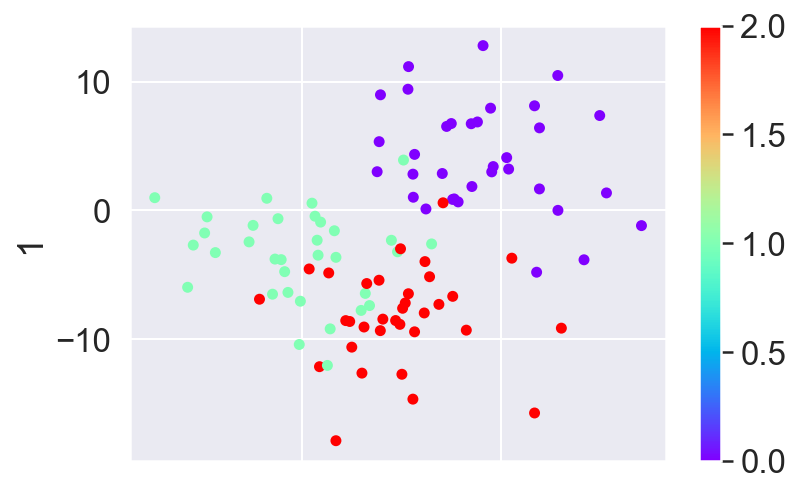

In [3]:
# Let's generate a new dataset that is a little more interesting

X, y = make_blobs(n_samples=100, centers=3, cluster_std=4, random_state=1)
X = pd.DataFrame(X)
X.plot(x=0, y=1, kind='scatter', c=y, colormap='rainbow');

In [4]:
X.shape

(100, 2)

## Hierachical clustering with sklearn

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [7]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([38, 36, 26]))

## Hierarchical clustering with SciPy

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, method='single', metric='euclidean')
```

Here, `X` is the data matrix, `method` allows to choose the linkage type (default `single`) and `metric` allows to specify the distance/similarity measure (default `'euclidean'`). 

After we cluster, we can obtain the dendrogram using the `dendrogram()` function from SciPy, which we can then draw using matplotlib. 

In [8]:
Z = linkage(X, method='ward', metric='euclidean')
Z.shape

(99, 4)

In [9]:
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link.head(10)

,cluster_index_left,cluster_index_right,distance,support
0,33.0,68.0,0.086912,2.0
1,35.0,39.0,0.212117,2.0
2,36.0,62.0,0.276547,2.0
3,18.0,21.0,0.313632,2.0
4,30.0,92.0,0.326100,2.0
5,54.0,58.0,0.340775,2.0
6,49.0,100.0,0.367225,3.0
7,26.0,55.0,0.367845,2.0
8,32.0,75.0,0.410257,2.0
9,23.0,27.0,0.418382,2.0


### Explanation of the linkage matrix


- An (n-1) by 4 matrix Z is returned. 
- At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. 
- A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. 
- The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

### Plotting the dendrogram

We plot the dendrogram based on the linkage matrix. Many plotting options are available.

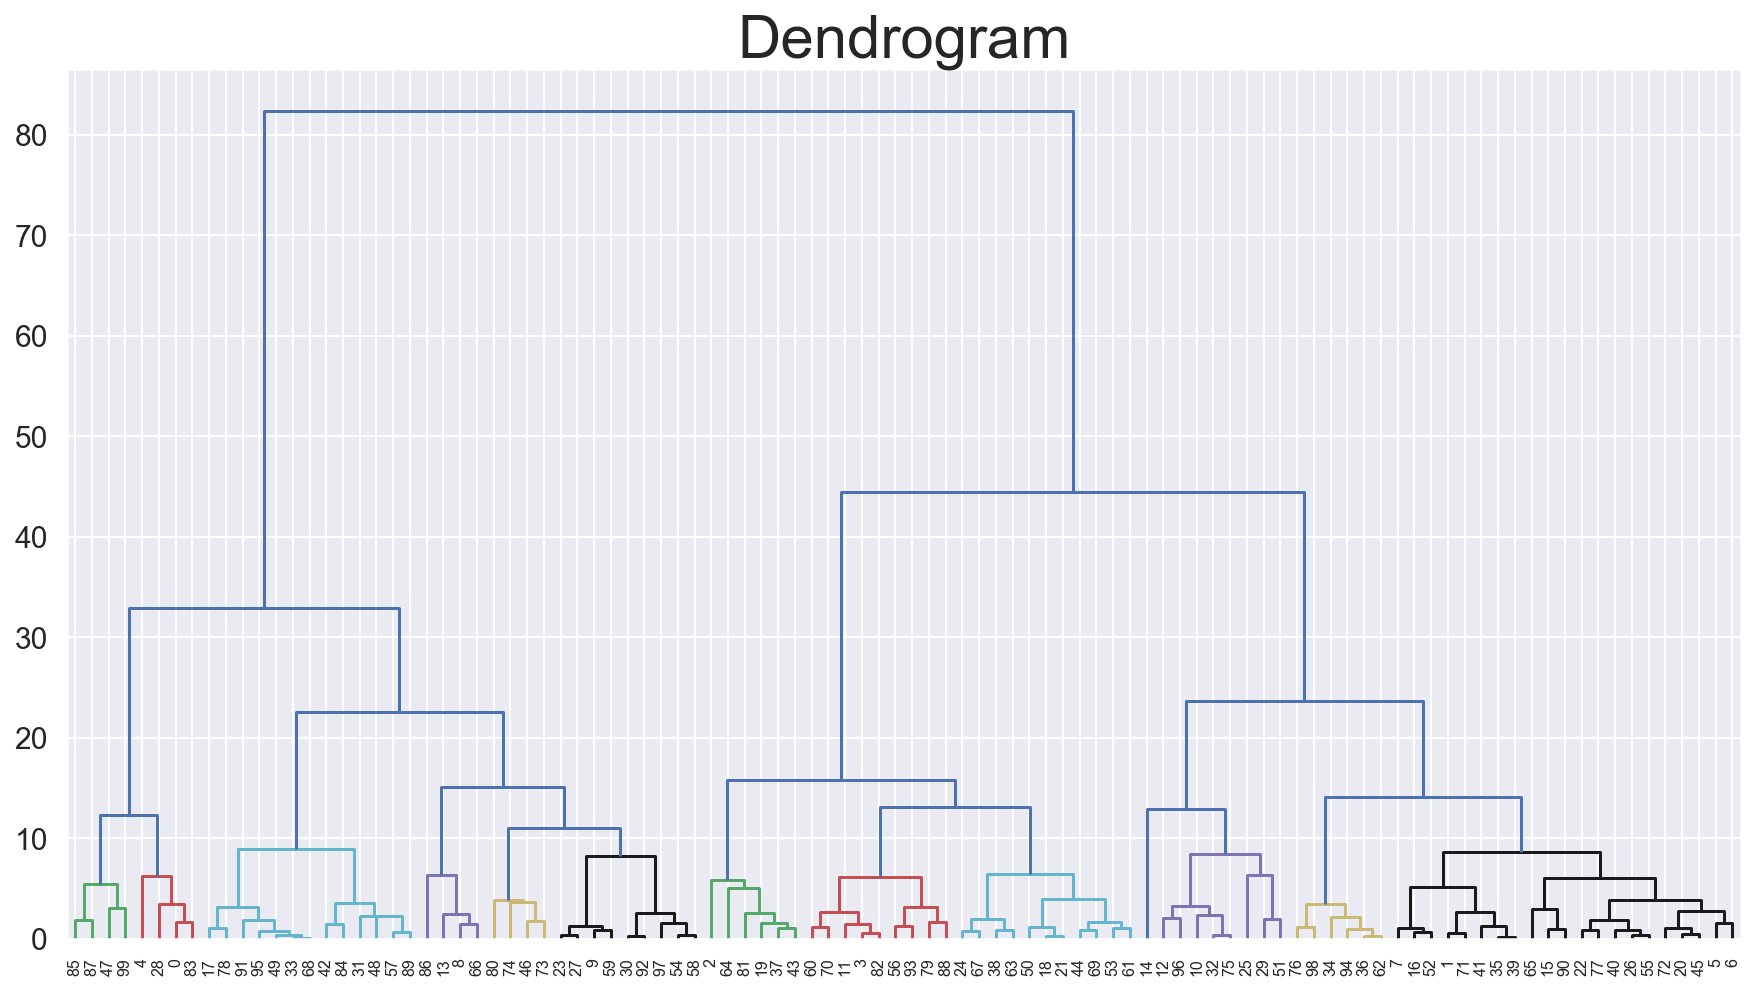

In [24]:
plt.figure(figsize=(15, 8))
dendrogram(
    Z,
    orientation='top',
    leaf_rotation=90.,  
    leaf_font_size=8.,
    color_threshold=10,
    #p = 10,
    truncate_mode='level',
    #truncate_mode='lastp'
)
plt.yticks(fontsize=15.)
plt.title('Dendrogram',fontsize=30)

plt.show()

### The cophenetic correlation coefficient

The **cophenetic correlation coefficient** measures the correlation between the distance between all pairs of observations in feature space and in the dendrogram (the height at which they are first merged into a single cluster). 


A high value (close to one) indicates that observations close to each other in feature space are merged into clusters first, a value close to -1 indicates that observations close to each other in feature space are merged into clusters last, and a value close to 0 indicates that distance in feature space is uncorrelated with merging.

[Detailed Cophenetic Coefficient Calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient)

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{\sum_{i<j}(x(i,j)-\bar{x})^2 \sum_{i<j}(t(i,j)-\bar{t})^2}}.
$$

where 

- $x(i,j)$: distance between observations $i,j$ in feature space
- $t(i,j)$: dendrogram height where observations $i,j$ are first merged into a single cluster 

With scipy, the cophenetic distance can be calculated based on the linkage and the distances between observations in feature space.

```python
c, coph_dists = cophenet(Z, pdist(X, metric='euclidean') )
```

This function returns the following:

- `coph_dists`: dendrogram height where observations $i,j$ are first merged into a single cluster, i.e. $t(i,j)$
- `c`: Cophenetic correlation coefficient (returned only if optional argument `pdist(X)` passed)

In [11]:
c, coph_dists = cophenet(Z, pdist(X, metric='euclidean'))
c

0.6893968397445114

A moderately high value means that the distances of the clusters are moderately related to the original distances of the data.

### Determining the clusters


We can use the ```fcluster``` function from ```scipy.cluster.hierarchy``` to assign cluster labels. Here we choose maximum distance in the dendrogram to fix the labels.

In [12]:
max_value = 30 # pairwise distance
clusters = fcluster(Z, max_value, criterion='distance')
np.unique(clusters).shape

(4,)

We can also define the maximal number of clusters.

In [13]:
clusters = fcluster(Z, 10, criterion='maxclust')
np.unique(clusters).shape

(10,)

Last, let's plot our data and assign the class labels as the color:

In [14]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [15]:
def plot_dendogram(X,  color_threshold=100, leaf_rotation=90, leaf_font_size=8.,
                   method='ward', metric='euclidean', ax=None, figsize=(15,15)):
    
    # Data prep
    
    Z = linkage(X, method=method, metric=metric)
    
    # plotting
    if ax==None:
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )
    else:
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )

    return ax
    


def plot_dist_thresh(X, max_value=100, color_threshold = 1, method='ward', metric='euclidean'):
    
    Z = linkage(X, method=method, metric=metric)
    clusters = fcluster(Z, max_value, criterion='distance')
    X['label'] = clusters
    labels = np.sort(X.label.unique())
    print("Clusters represented at distance: ", labels)
    
    
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))
    
    for label, color in zip(np.sort(X.label.unique()), colors):
        X_sub = X[X.label == label]
        ax[0].scatter(X_sub.iloc[:,0], X_sub.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
    
    ax[0].set_title("Max Value: %d" % max_value)
    
    ax[0].legend(loc=[2.5,0], shadow=True, scatterpoints=1)
    
    t = (0, 10000)
    
    ax[1].plot(t, (max_value, max_value), 'r--')
    ax[1] = plot_dendogram(X.iloc[:, :2], color_threshold=color_threshold, method=method, metric=metric, ax=ax[1])
    
    return fig, ax

def plot_wrapper(max_value):
    plot_dist_thresh(X, max_value, color_threshold=10)
    plt.show()

In [16]:
interact(plot_wrapper, max_value=IntSlider(min=5, max=100, step=1))

interactive(children=(IntSlider(value=5, description='max_value', min=5), Output()), _dom_classes=('widget-int…

<function __main__.plot_wrapper(max_value)>

Clusters represented at distance:  [1 2 3]
Clusters represented at distance:  [1 2 3 4]
Clusters represented at distance:  [1 2 3 4 5]
Clusters represented at distance:  [1 2 3 4 5 6 7 8]
Clusters represented at distance:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


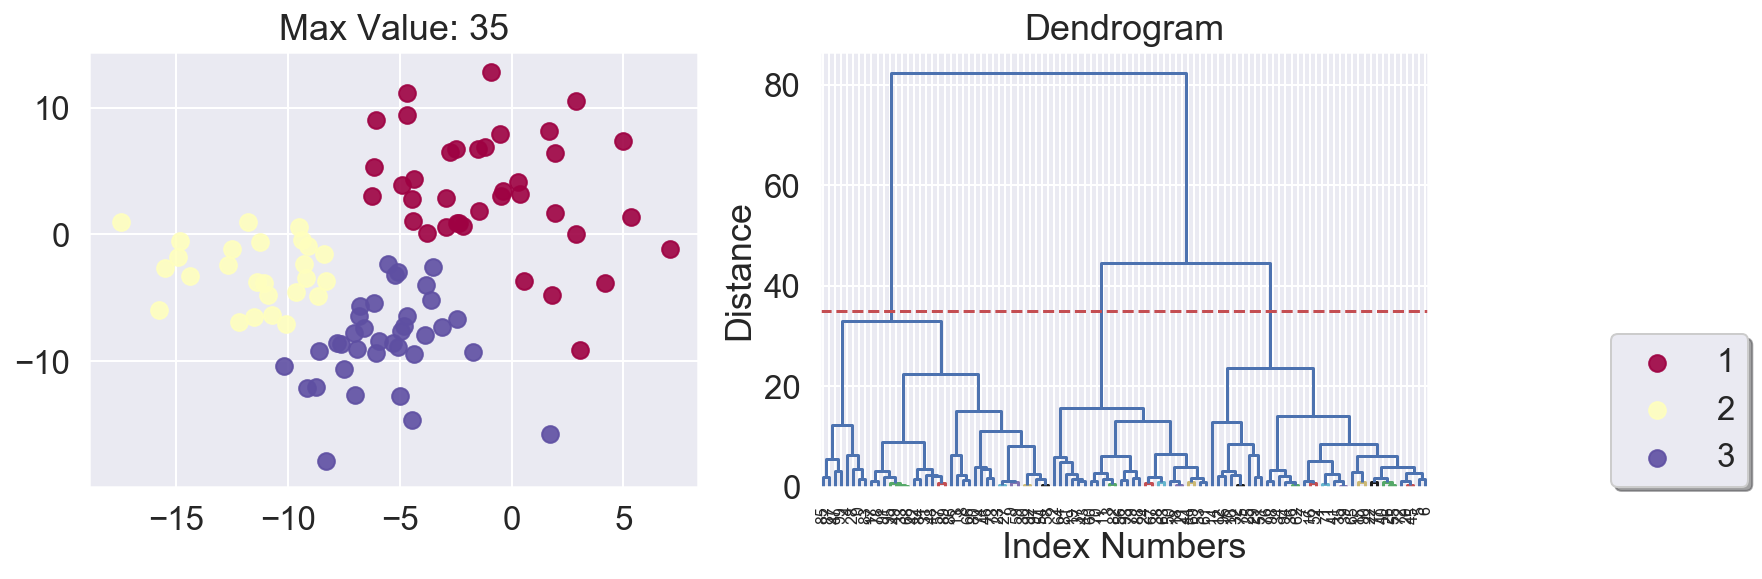

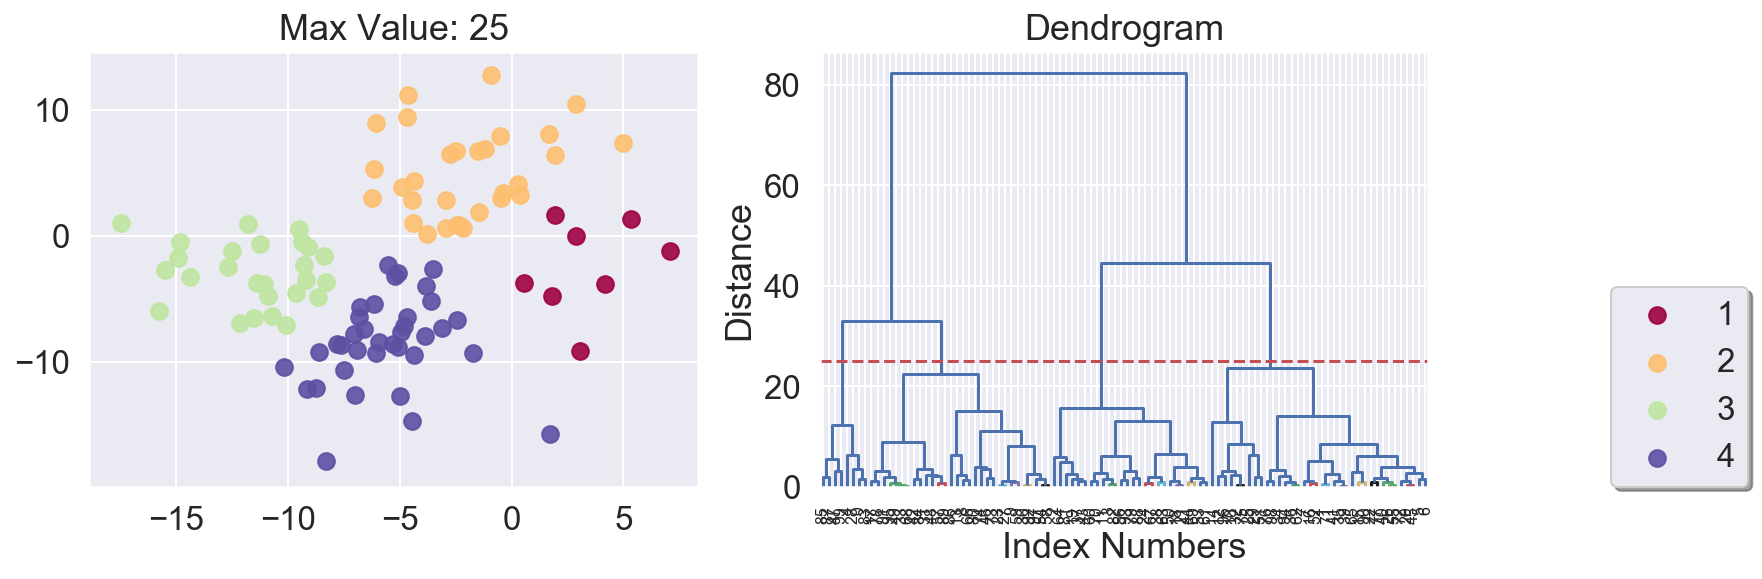

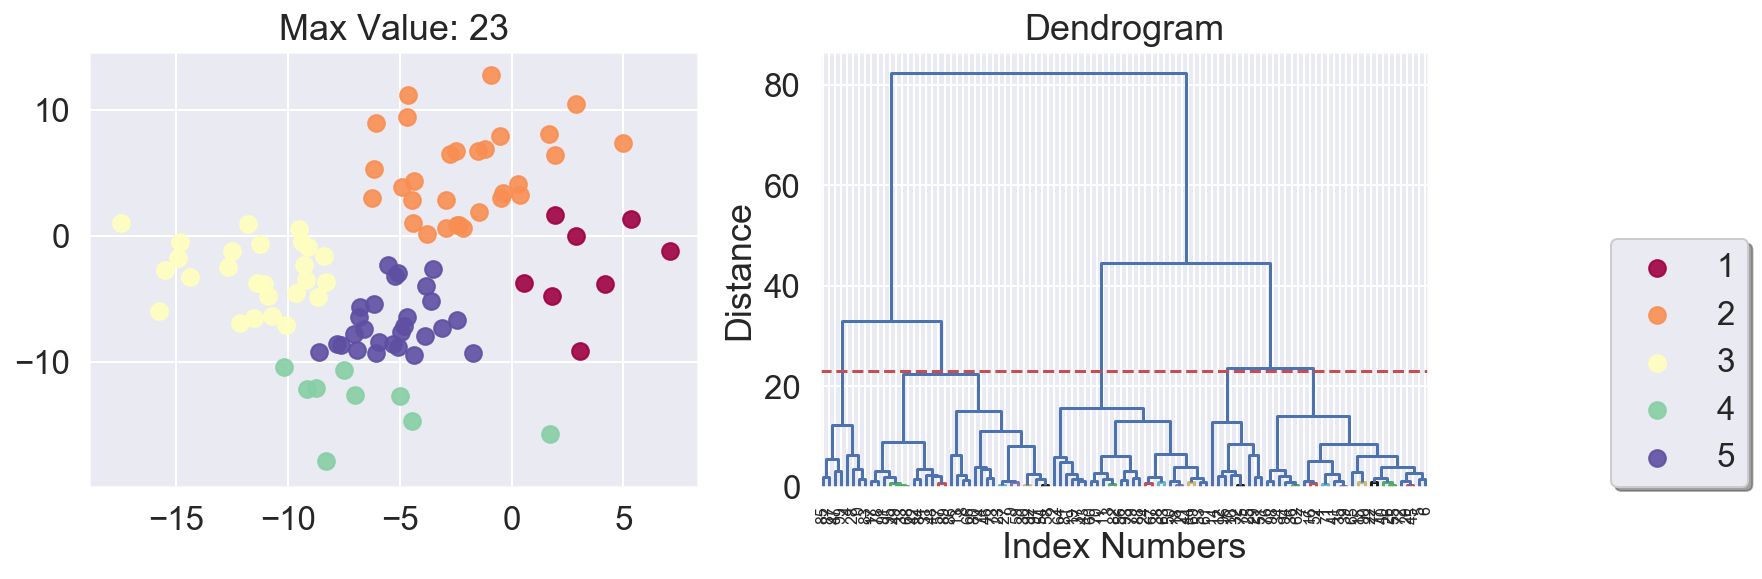

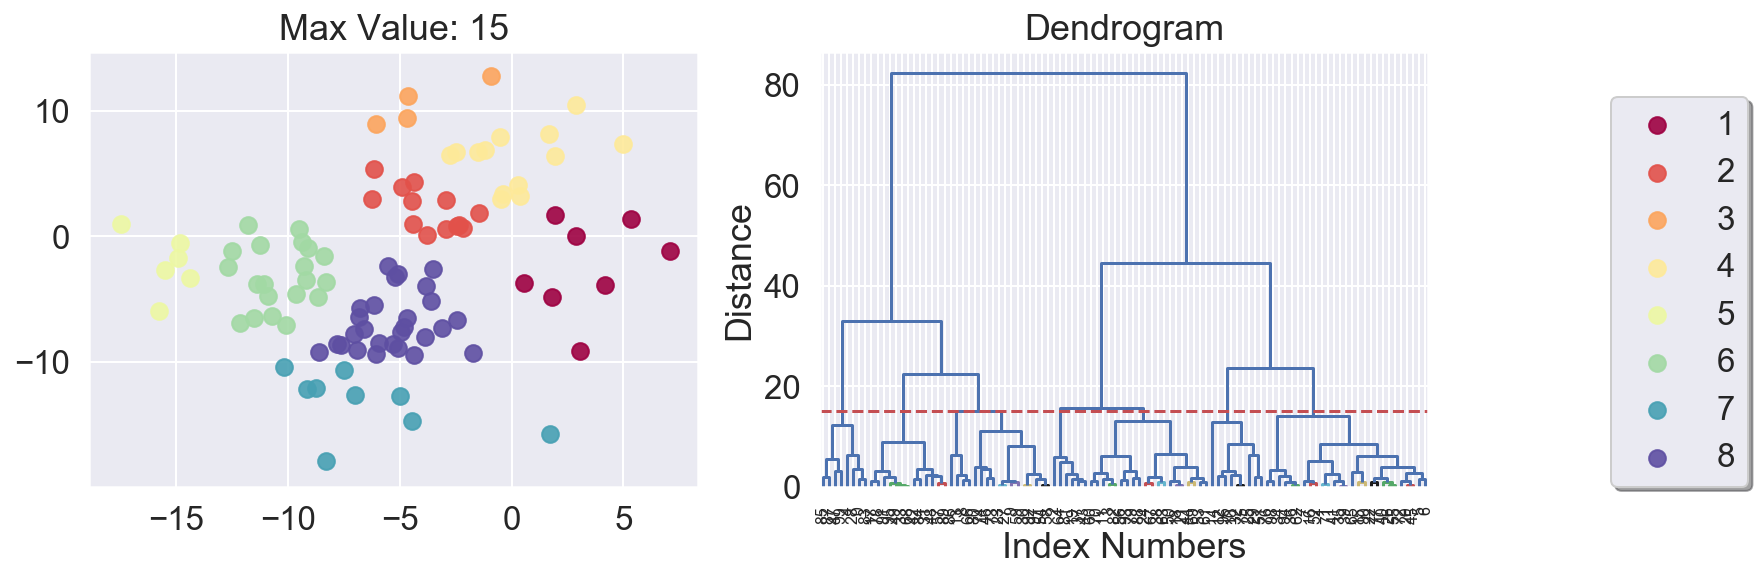

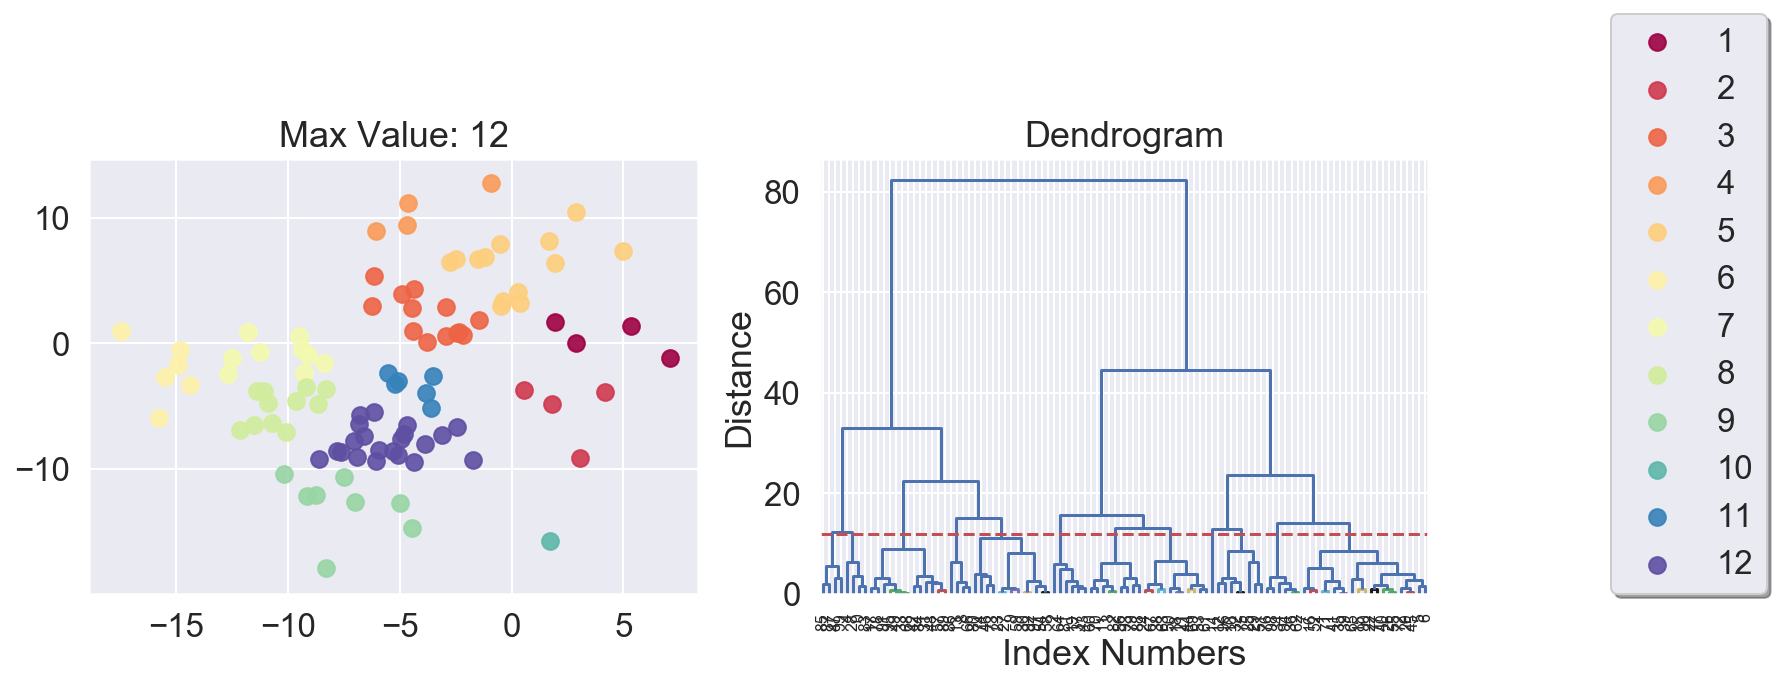

In [17]:
fig, ax = plot_dist_thresh(X.iloc[:,:2], 35)
fig, ax = plot_dist_thresh(X.iloc[:,:2], 25)
fig, ax = plot_dist_thresh(X.iloc[:,:2], 23)
fig, ax = plot_dist_thresh(X.iloc[:,:2], 15)
fig, ax = plot_dist_thresh(X.iloc[:,:2], 12)

## Conclusion
---

- Recall the definitions of linkage, cophenetic coefficient, and dendrogram
- Recap and recall the process steps in hierachical clustering
    - Linkage: First, we create the linkages in python that form the basis of our analysis
    - Cophenetic Coefficient: We find the cophenetic coefficient to determine how well our analysis is running
    - Dendrogram: We plot the dendrogram and visually inspect the clusters
    - Lastly, we find our cluster ID's and plot

## Additional resources 

---

- [SciPy Documentation for Linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What even is this Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)
- [SKlearn docs](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) on hierarchical clustering
- [Stanford walkthrough of hierarchical clustering](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf)
- [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering) on hierarchical clustering
- [Example of hierarchical clustering US cities](http://www.analytictech.com/networks/hiclus.htm)
- [Cophenetic correlation wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation) on cophrenetic coefficients
- [Cophenetic intuitive explanation](http://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm) of cophrenetic coefficients
- [Joseph Nelson's video](https://www.youtube.com/watch?v=62cphKGR0_s) explaining hierarchical clustering in seven minutes 
- A contrasting example of differing [cophenetic coefficients](http://stats.stackexchange.com/questions/33066/on-cophenetic-correlation-for-dendrogram-clustering)